In [4]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
diabetes_df = pd.read_csv("diabetes_clean.csv")
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [11]:
diabetes_df[diabetes_df['glucose'] == 0]

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
75             1        0         48       20        0  24.7  0.140   22   
182            1        0         74       20       23  27.7  0.299   21   
342            1        0         68       35        0  32.0  0.389   22   
349            5        0         80       32        0  41.0  0.346   37   
502            6        0         68       41        0  39.0  0.727   41   

     diabetes  
75          0  
182         0  
342         0  
349         1  
502         1

In [15]:
diabetes_df[diabetes_df['bmi'] > 0]

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0              6      148         72       35        0  33.6  0.627   50   
1              1       85         66       29        0  26.6  0.351   31   
2              8      183         64        0        0  23.3  0.672   32   
3              1       89         66       23       94  28.1  0.167   21   
4              0      137         40       35      168  43.1  2.288   33   
..           ...      ...        ...      ...      ...   ...    ...  ...   
763           10      101         76       48      180  32.9  0.171   63   
764            2      122         70       27        0  36.8  0.340   27   
765            5      121         72       23      112  26.2  0.245   30   
766            1      126         60        0        0  30.1  0.349   47   
767            1       93         70       31        0  30.4  0.315   23   

     diabetes  
0           1  
1           0  
2           1  
3           0  
4           1  
..        ...  
763         0  
764         0  
765         0  
766         1  
767         0  

[757 rows x 9 columns]

In [20]:
diabetes_df = diabetes_df[
    (diabetes_df['glucose'] > 0)
    & (diabetes_df['bmi'] > 0)
]

In [ ]:
#        0    |      1    |       2 |      3  |  4  | ...
# pregnancies | diastolic | triceps | insulin | bmi | ...
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [24]:
X

array([[ 6.   , 72.   , 35.   , ...,  0.627, 50.   ,  1.   ],
       [ 1.   , 66.   , 29.   , ...,  0.351, 31.   ,  0.   ],
       [ 8.   , 64.   ,  0.   , ...,  0.672, 32.   ,  1.   ],
       ...,
       [ 5.   , 72.   , 23.   , ...,  0.245, 30.   ,  0.   ],
       [ 1.   , 60.   ,  0.   , ...,  0.349, 47.   ,  1.   ],
       [ 1.   , 70.   , 31.   , ...,  0.315, 23.   ,  0.   ]],
      shape=(752, 8))

In [22]:
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)

(752,) (752,)


In [26]:
X_bmi[-1]

array([30.4])

In [27]:
# -1 é equivalente a última linha, e 1 afirma que temos apenas uma única coluna.  
X_bmi = X_bmi.reshape(-1, 1)  # cria uma matriz 2D de uma única coluna.
print(y.shape, X_bmi.shape)

(752,) (752, 1)


In [28]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------- ------------- 5.2/8.1 MB 35.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 26.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 39.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


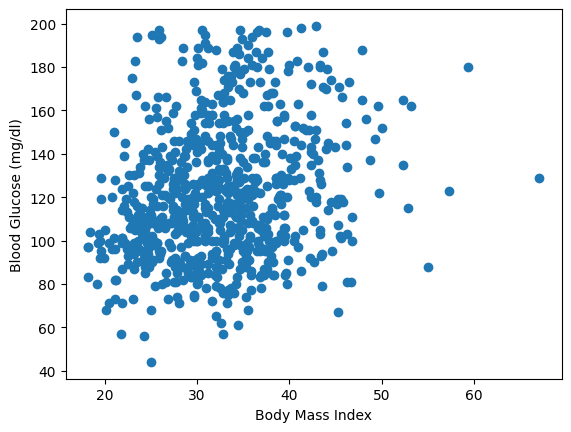

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")

plt.show()

In [32]:
%pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_bmi, y)

LinearRegression()

In [38]:
predictions = reg.predict(X_bmi)

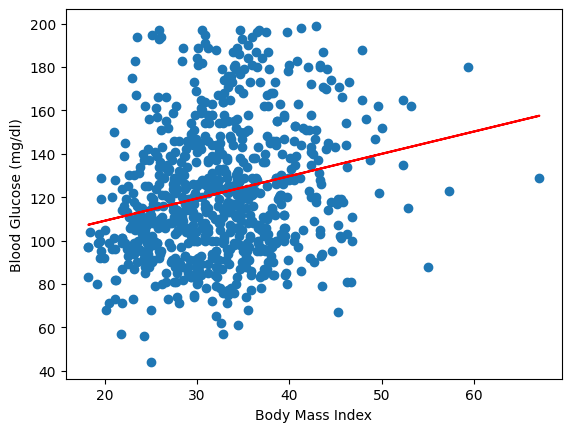

In [40]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='red')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()